# Exploring the Jupyter notebook, version with answers

In this notebook, we borrow quite heavily from a similar course: [Python4AstronomersAndParticlePhysicists](https://github.com/Python4AstronomersAndParticlePhysicists/PythonWorkshop-ICE/blob/master/notebooks/03_02_TipsAndTricks.ipynb). Those parts where used under the [MIT license](LICENSE-Python4AstronomersAndParticlePhysicists).

## About Jupyter notebook

If you're not comfortable with the Jupyter notebook environment, now is the time to learn. The interface has two states (much like e.g. `vi`): a *command mode* and an *edit mode*. 

If you highlight a code cell, you can press **Shift-Enter** to evaluate it in python. If you press **Alt-Enter**, the cell will be evaluated and a new cell is inserted below it.

**Exercise**: Fix and execute the cell below.

In [18]:
pangram = "The quick brown fox jumps over the lazy dog"
print(pangram)

The quick brown fox jumps over the lazy dog


You can evaluate all the commands already present in this notebook. To understand the commands, you can try to predict the outcome of a statement before evaluating it. Also, you are encouraged to change the commands.

  * To go to edit mode, press Enter or double click a cell.
  * To go back to command mode, press Esc or single click another cell.

Most useful commands in command mode:
 * **a** for adding a cell above
 * **b** for adding a cell below
 * **m** change a cell into a markdown cell
 * **y** change a cell into a code cell
 * **x** cut a cell
 * **v** paste a cell below

**Exercise**: Insert a new markdown cell below this one and evaluate it. See what happens if you include some $\LaTeX$ (e.g. `$\sum_{i=0}^\infty \frac{1}{i^2} = \frac{\pi^2}{6}$`. Evaluate the cell with Shift-Enter to see the rendered output. (Bonus exercise: edit this equation to make it correct.)

Note that the code cells are evaluated in the order you evaluate them, so not necessarily from top to bottom.

**Exercise**: Evaluate the cells below (don't change them) to have the second cell output `42`.

**Answer**: Use the fact that 4 + 4×7 + 2×5 = 42.

In [6]:
a = 4

In [13]:
print(a)

42


In [12]:
a += 5

In [10]:
a += 7

We'll remove the variable `a` from the namespace to prevent confusion if we'll use a variable named `a` further on.

In [14]:
del a

## Initialize and check environment

In [15]:
import sys

In [16]:
sys.executable

'/anaconda/envs/school19/bin/python'

The above line should mention that you're running python from the `school19` environment

## Plotting inside notebooks

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import numpy as np

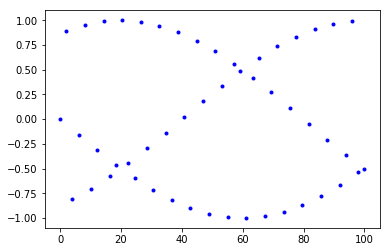

In [13]:
x = np.linspace(0, 100)
plt.plot(x, np.sin(x), 'b.');

**Exercise**: explain why we don't see a (one) sine here; fix this.

**Answer**: you're seeing [aliasing](https://en.wikipedia.org/wiki/Aliasing#Sampling_sinusoidal_functions). Increase the number of points in `x`, or plot from 0 to 10 instead.

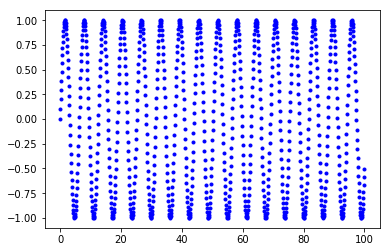

In [20]:
x = np.linspace(0, 100, 1000)
plt.plot(x, np.sin(x), 'b.');

## Getting help

Reading the documentation of well-documented code can be useful. In ipython and jupyter, a function's documentation can be read by appending a question mark:

In jupyter, you can get this help as a popup window by typing the function, and then pressing Shift-Tab.

**Exercise**: read the docs of `np.sin` and try to use the `out` parameter.

In [ ]:
x = np.linspace(0, 10.)
y = np.zeros_like(x)

np.sin(x, y);
y

array([ 0.        ,  0.20266794,  0.39692415,  0.57470604,  0.72863478,
        0.85232157,  0.94063279,  0.98990308,  0.99808748,  0.96484631,
        0.89155923,  0.78126802,  0.63855032,  0.46932961,  0.2806294 ,
        0.08028167, -0.12339814, -0.32195632, -0.50715171, -0.67129779,
       -0.80758169, -0.91034694, -0.97532829, -0.99982867, -0.9828312 ,
       -0.92504137, -0.82885774, -0.6982724 , -0.53870529, -0.35677924,
       -0.16004509,  0.04333173,  0.24491007,  0.43632343,  0.6096272 ,
        0.75762842,  0.8741843 ,  0.9544572 ,  0.99511539,  0.99447137,
        0.95255185,  0.8710967 ,  0.75348673,  0.60460332,  0.43062587,
        0.23877532,  0.0370144 , -0.16628279, -0.36267843, -0.54402111])

## Notebook / IPython magic

The `%matplotlib inline` is a "magic" command for ipython. The following prefixes will do something useful:
 * `!`: execute a system command (through `os.system`)
 * `%`: execute a "line magic"
 * `%`: execute a "cell magic"
 * `?` or `??`: get help (or more help)

The magic command `%quickref` should give you a quick reference; however it's not really quick. We'll try to list a few useful of these many commands.

**Exercise**: skim through the output of `%quickref` (or if you're in Jupyter Lab, `%lsmagic`), try to make a `%%html` cell.

In [22]:
%%html
<img src="//imgs.xkcd.com/comics/python.png" title="I wrote 20 short programs in Python yesterday.  It was wonderful.  Perl, I'm leaving you." alt="Python">

**Exercise**: delete the output of `%quickref` (but not the input cell that generated it).

**Answer**: in Jupyter Lab, click the blue bar next to the output cell, choose "Clear Output". Or in the Edit menu, choose "Clear output".

**Exercise**: view all variables that have been defined so far in this notebook with `%who`.

In [23]:
%who

np	 pangram	 plt	 sys	 x	 


## Comprehensions

Python provides some "compound data types", such as:
* list: ordered and mutable array of objects, `['abcd', 786 , 2.23, 'john', 70.2]`
* tuple: immutable list, `('abcd', 786 , 2.23, 'john', 70.2)`
* dictionary = mutable array of key-value pairs, `{'name': 'john', 'code': 6734, 'dept': 'sales'}`
* set: unordered and mutable set of objects, `{1, 2., 'a'}`

The difference between *mutable* and *immutable* is that mutable objects can be changed.

Comprehensions provide a concise way of creating some of them (lists, dictionaries or sets). They do not necessarily improve performance with respect to traditional *for* loops. They do reduce the amount of code and make it more readable.

In [19]:
N_SQUARES = 10

# Don't do this!!!
ugly_list = []
for i in range(N_SQUARES):
    ugly_list.append(i**2)

print('ugly list = {}'.format(ugly_list))

ugly list = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


You can do the same in one line:

In [20]:
wonderful_list = [ i**2 for i in range(N_SQUARES) ]
print('wonderful list = {}'.format(wonderful_list))

wonderful list = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


List comprehensions can contain `if` clauses after the `for` clause:

In [21]:
even_list = [ i**2 for i in range(N_SQUARES) if i % 2 == 0]

**Exercise**: Use a list comprehension to count the occurrences of all letters in the alphabet in the variable "`pangram`". The variable "`pangram`" should still be defined, otherwise define it again as "The wizard quickly jinxed the gnomes before they vaporized." or some other pangram.
**Hint**: use the `.count` method of the string.

In [22]:
import string
alphabet = string.ascii_lowercase

In [23]:
[pangram.count(letter) for letter in alphabet]

[1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1]

A similar syntax as for list comprehensions can be used to create dictionaries:

In [24]:
{letter: ord(letter) for letter in alphabet[:6]}

{'a': 97, 'b': 98, 'c': 99, 'd': 100, 'e': 101, 'f': 102}

**Exercise**: use a dict comprehension for the previous exercise to create a dict with the occurrences of all letters in `pangram`. Store it in `letter_count` (we'll use this later).

In [25]:
letter_count = {letter: pangram.count(letter) for letter in alphabet}

In [26]:
letter_count

{'a': 1,
 'b': 1,
 'c': 1,
 'd': 1,
 'e': 3,
 'f': 1,
 'g': 1,
 'h': 2,
 'i': 1,
 'j': 1,
 'k': 1,
 'l': 1,
 'm': 1,
 'n': 1,
 'o': 4,
 'p': 1,
 'q': 1,
 'r': 2,
 's': 1,
 't': 1,
 'u': 2,
 'v': 1,
 'w': 1,
 'x': 1,
 'y': 1,
 'z': 1}

## String formatting

The built-in `str` type contains a `format` method that allows complex variable substitutions and value formatting. To print something, use curly braces as placeholder for the data:

In [28]:
my_int = 42
"The number forty-two is commonly represented as {}".format(my_int)

'The number forty-two is commonly represented as 42'

Inside the curly braces, you can specify formatting rules after the colon:

In [29]:
"Integer with leading zeroes: {:06}".format(42)

'Integer with leading zeroes: 000042'

In [30]:
"Float with two decimal positions: {:.4f}".format(42/9)

'Float with two decimal positions: 4.6667'

The part before the colon is reserved for specifing which argument you want to place there:

In [31]:
"Referenced by index: {1} and {0}".format(42, 3)

'Referenced by index: 3 and 42'

If you omit indexes (don't do this if you have more than two things to print), the arguments are filled in in their order:

In [32]:
"Just two numbers: {} and {}".format(42, 3)

'Just two numbers: 42 and 3'

In [33]:
var1 = 3
var2 = 42
"Referenced by name: {var2:.3f} and {var1:}".format(var2=var2, var1=var1)

'Referenced by name: 42.000 and 3'

A little trick: you can use the dict `locals` to fill in all variables in the current local namespace and refer to them by their name:

In [34]:
"Currently, we have {var2:.3f} and {pangram}".format(**locals())

'Currently, we have 42.000 and The quick brown fox jumps over the lazy dog'

**Note**: as of python 3.6, you can use "f-strings" to do the same:

In [35]:
f"Currently, we have {var2:.3f} and {pangram}"

'Currently, we have 42.000 and The quick brown fox jumps over the lazy dog'

**Exercise**: create some code that creates a text-only barchart for the letter count in `letter_count`, i.e.
```
Letter count for the pangram "The quick brown fox jumps over the lazy dog"
a: 1
b: 1
c: 1
d: 02
e: 003
f: 1
g: 1
...
```

**Hint**: Use `{:0"+str(count)+"}"` as the formatter for the count.

In [33]:
print("Letter count for the pangram \"{}\"".format(pangram))
for letter, count in letter_count.items():
    print(("{}: {:0" + str(count) + "d}").format(letter, count))

Letter count for the pangram "The quick brown fox jumps over the lazy dog"
a: 1
b: 1
c: 1
d: 1
e: 003
f: 1
g: 1
h: 02
i: 1
j: 1
k: 1
l: 1
m: 1
n: 1
o: 0004
p: 1
q: 1
r: 02
s: 1
t: 1
u: 02
v: 1
w: 1
x: 1
y: 1
z: 1


## Args and kwargs

The special syntax, `*` and `**` in function definitions is used to pass a variable number of arguments to a function. As an example, consider the following function:

In [37]:
def multiply(*args, **kwargs):
    """Multiply all arguments"""
    result = 1.
    for arg in args:
        result *= arg
    
    if "add_two" in kwargs and kwargs["add_two"]:
        result += 2
    return result

In [38]:
multiply(3, 5, 15+3j, add_two=True)

(227+45j)

A common use case of `*args` and `*kwargs` is to wrap a function and pass on all arguments and keyword arguments:

In [39]:
def thrice_sin(*args, **kwargs):
    """Compute the sine with a range from -3 to +3"""
    
    return 3 * np.sin(*args, **kwargs)

In [40]:
thrice_sin(np.pi/2)

3.0

Inside the function, `*args` is a tuple and `**kwargs` is a dict. The `*` and `**` also work the other way around: they can be used to pass dictionary as keyword-arguments and a tuple (or other iterable) as a fixed arguments (note that here, `options` undergoes a change from dict to arguments to dict again.

In [41]:
options = {'add_two': True}
nums = range(1, 5)
multiply(*nums, **options)

26.0

In functions, key-word arguments can also be given as positional arguments. Consider the following example:

In [42]:
def add_numbers(a, b, clear_system=False):
    "Add two numbers; optionally clears the operating system"
    
    if clear_system:
        print("rm /")
        
    return a+b

**Exercise**: What is the output of `add_numbers(1, 2, 3)`?

**Answer**: it prints `rm /`, because the value 3 is interpreted as the value for `clear_system`, and 3 is interpreted as `True`.

A way to force the keyword-arguments to be given as keywords (i.e. `clear_system=True`), is to catch all intermediate `*args`. Moreover, you can tell python there should not be any intermediate args by calling it `*` instead of `*args`:

In [ ]:
def add_numbers(a, b, *, clear_system=False):
    "Add two numbers; optionally clears the operating system"
    
    if clear_system:
        print("rm /")
        
    return a+b

**Exercise**: modify this function to handle any number of (positional) arguments.

In [ ]:
def add_numbers(*args, clear_system=False):
    "Add two numbers; optionally clears the operating system"
    
    if clear_system:
        print("rm /")
        
    return sum(args)

In [ ]:
add_numbers(4, 1, 1981)

1986

## Interact and interactive

Now that we're in a browser, we can make use of some web technology (Javascript etc) to make our environment more interactive. This can be done by using `ipywidgets`. Read the [docs](http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) for more info. But just carry on below to start experimenting.

**Note**: the following may not work in Jupyter Lab because it is more restrictive to using JavaScript (for security reasons). Only for Jupyter Lab, you should activate the widgets. This is best done in a terminal:

```
conda activate school19
conda install nodejs
jupyter labextension install @jupyter-widgets/jupyterlab-manager
```
**If this does not work please use Jupyter Notebook for now** (Jupyter lab is still in beta, it cost me a day to get it working in my hybrid MacOS / homebrew / conda environment).

In [1]:
from ipywidgets import interact

In [6]:
def mult3(x, *, add_two=False):
    """Multiply a number by three, optionally adding the number two"""
    result = 3 * x
    if add_two:
        result += 2
    return result

In [7]:
interact(mult3, x=[1,2,3], add_two=True);

interactive(children=(Dropdown(description='x', options=(1, 2, 3), value=1), Checkbox(value=True, description=…

**Exercise**: see what the user interface magic does if you pass a list as value for `x`. What happens if you change the default value to a string?

**Exercise**: create a function that creates a plot of a translated sine, i.e. a plot of `np.sin(x-a)`, where `x` ranges from 0 to 10 and `a` is the argument of the function.

In [14]:
def plot_sin(a):
    x = np.linspace(0, 10)
    plt.plot(x, np.sin(x-a))

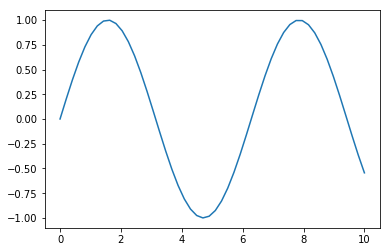

In [15]:
plot_sin(0)

**Exercise**: use `interact` to show this plot with a slider for the value of `a` (bonus: read the [docs](http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#Flickering-and-jumping-output) and remove the flickering).

In [16]:
from ipywidgets import interactive
w = interactive(plot_sin, a=(0., 2*np.pi))
w.children[-1].layout.height = '260px'
w

interactive(children=(FloatSlider(value=3.141592653589793, description='a', max=6.283185307179586), Output(lay…

## Acknowledgements
![](./eu_asterics.png)

This tutorial was supported by the H2020-Astronomy ESFRI and Research Infrastructure Cluster (Grant Agreement number: 653477).